In [39]:
import nfl_data_py as nfl
import pandas as pd
pd.options.display.max_columns = None
year = 2023
data = nfl.import_pbp_data([year], downcast=True, cache=False, alt_path=None)
data.head()


2023 done.
Downcasting floats.


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_ta

In [43]:
cols = ['play_id', 'game_id', 'desc','home_team', 'away_team', 'posteam', 
        'yardline_100', 'ydstogo', 'half_seconds_remaining', 'game_half', 
        'drive', 'down', 'qb_dropback', 'qb_kneel', 'qb_spike','pass_attempt',
        'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 
        'score_differential', 'epa', 'home_wp', 'away_wp',
        'extra_point_attempt', 'two_point_attempt', 'field_goal_attempt', 
        'kickoff_attempt', 'punt_attempt']

df_train = data[cols]
df_train['game_half'] = df_train['game_half'].map({'Half1': 1, 'Half2': 2})
df_train = df_train[(df_train['down'].notna()) &
                    (df_train['pass_attempt'].notna())&
                    (df_train['qb_dropback'].notna())&
                    (df_train['game_half'].notna())&
                    (df_train['extra_point_attempt'] == 0)&
                    (df_train['two_point_attempt'] == 0)&
                    (df_train['field_goal_attempt'] == 0)&
                    (df_train['kickoff_attempt'] == 0)&
                    (df_train['punt_attempt'] == 0)&
                    (df_train['qb_spike'] == 0)&
                    (df_train['qb_kneel'] == 0)]
df_train.to_csv(f'{year}_train.csv')

C:\Users\dfrid\AppData\Local\Temp\ipykernel_36148\3979424346.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['game_half'] = df_train['game_half'].map({'Half1': 1, 'Half2': 2})


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_features_and_target(df):
    """
    Prepare features for the QB dropback prediction model.
    """
    # Create target variable - 1 for dropback, 0 for run
    y = df['qb_dropback'].astype(int)
    
    # Select relevant features for game state
    feature_cols = [
        'yardline_100',         # Field position
        'ydstogo',              # Yards to go for first down
        'half_seconds_remaining',# Time remaining in half
        'game_half',            # Which half of the game
        'down',                 # Current down
        'posteam_timeouts_remaining',
        'defteam_timeouts_remaining',
        'score_differential'    # Score difference
    ]
    
    X = df[feature_cols].copy()
    
    return X, y, feature_cols

def train_dropback_model(df):
    """
    Train a Random Forest model to predict QB dropbacks.
    """
    # Prepare features and target
    X, y, feature_cols = prepare_features_and_target(df)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42
    )
    
    rf_model.fit(X_train_scaled, y_train)
    
    # Get probabilities for test set
    y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Make predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    probabilities = rf_model.predict_proba(X_scaled)[:, 1]
    
    # Create a mapping from filtered indices to original indices
    original_indices = df.index
    
    # Create a Series with predictions for all rows in original dataframe
    all_probabilities = pd.Series(index=df.index, dtype='float64')
    all_probabilities.loc[original_indices] = probabilities
    
    return {
        'model': rf_model,
        'scaler': scaler,
        'feature_importance': feature_importance,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'test_data': (X_test, y_test),
        'predictions': y_pred,
        'roc_data': {
            'fpr': fpr,
            'tpr': tpr,
            'auc': roc_auc
        },
        'predicted_probs' : probabilities
    }

def plot_model_insights(results):
    """
    Plot feature importance and confusion matrix.
    """
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot feature importance
    sns.barplot(
        data=results['feature_importance'],
        x='importance',
        y='feature',
        ax=ax1
    )
    ax1.set_title('Feature Importance')
    
    # Plot confusion matrix
    sns.heatmap(
        results['confusion_matrix'],
        annot=True,
        fmt='d',
        ax=ax2,
        xticklabels=['Run', 'Dropback'],
        yticklabels=['Run', 'Dropback']
    )
    ax2.set_title('Confusion Matrix')
    
    plt.tight_layout()
    return fig

def plot_roc_curve(results):
    """
    Plot ROC curve with AUC score.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot ROC curve
    plt.plot(
        results['roc_data']['fpr'], 
        results['roc_data']['tpr'], 
        color='darkorange',
        lw=2, 
        label=f'ROC curve (AUC = {results["roc_data"]["auc"]:.2f})'
    )
    
    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      3211
           1       0.72      0.70      0.71      4330

    accuracy                           0.68      7541
   macro avg       0.67      0.67      0.67      7541
weighted avg       0.68      0.68      0.68      7541



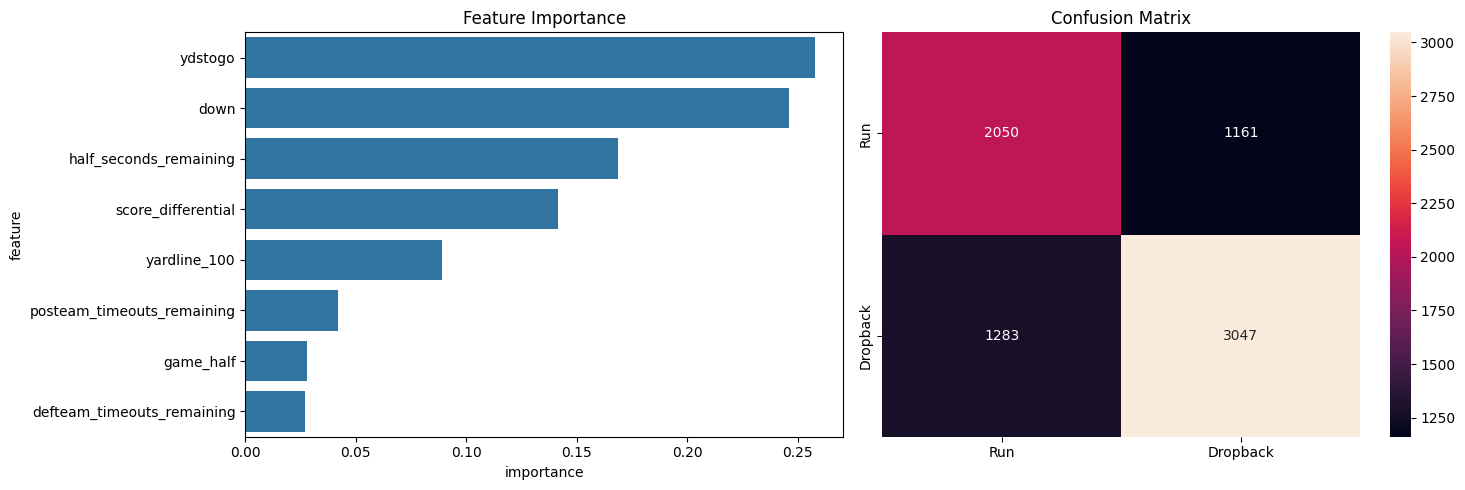

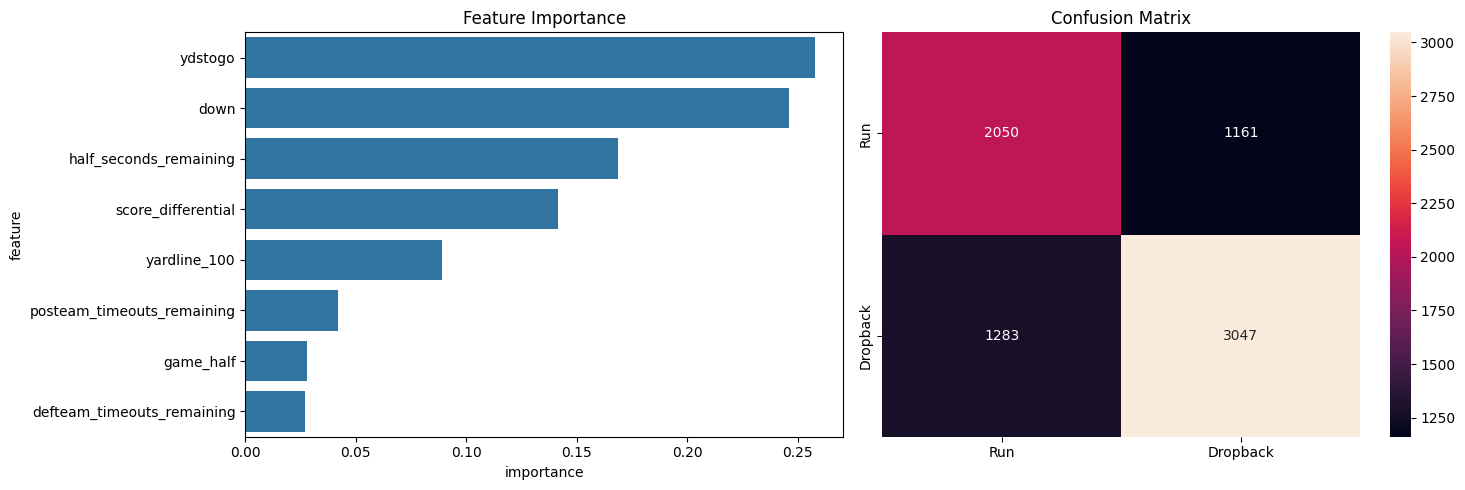

In [45]:
# Train the model and get results
results = train_dropback_model(df_train)

# Print classification report
print(results['classification_report'])

# Plot insights
plot_model_insights(results)

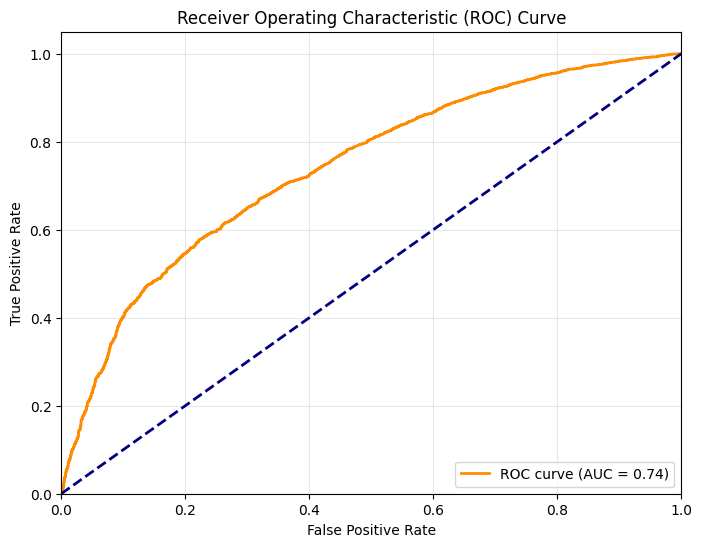

AUC Score: 0.740


In [46]:
# Plot ROC curve
plot_roc_curve(results)
plt.show()

# Print AUC score
print(f"AUC Score: {results['roc_data']['auc']:.3f}")

In [90]:
year = 2022
data_2022 = nfl.import_pbp_data([year], downcast=True, cache=False, alt_path=None)
data_2022.head()

2022 done.
Downcasting floats.


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_ta

In [91]:
path = r"C:\Users\dfrid\Downloads\nfl-big-data-bowl-2025\plays.csv"
playaction_df = pd.read_csv(path)
playaction_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,01:54,35,17,N,31,0.982017,0.017983,0.719313,EMPTY,3x2,10.0,C,6.0,36.69,16.51,False,TRADITIONAL,2.40,INSIDE_BOX,2.990,2.990,NaN,False,False,False,0,NaN,NaN,NaN,9,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,02:13,17,17,N,18,0.424356,0.575644,0.607746,EMPTY,3x2,9.0,C,4.0,20.83,20.49,False,TRADITIONAL,1.14,INSIDE_BOX,1.836,1.836,NaN,False,False,False,0,NaN,NaN,NaN,4,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,02:00,3,17,N,30,0.006291,0.993709,-0.291485,SHOTGUN,2x2,12.0,C,-4.0,26.02,17.56,False,TRADITIONAL,3.20,INSIDE_BOX,2.236,2.236,NaN,False,False,False,0,NaN,NaN,NaN,6,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,09:28,0,0,N,33,0.884223,0.115777,4.249382,SHOTGUN,2x2,11.0,C,-6.0,38.95,14.19,False,TRADITIONAL,3.02,INSIDE_BOX,2.202,2.202,NaN,False,False,False,0,NaN,NaN,NaN,4,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,02:16,10,10,N,37,0.410371,0.589629,3.928413,PISTOL,3x1,8.0,NaN,NaN,NaN,NaN,True,DESIGNED_RUN,2.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,INSIDE_LEFT,NaN,-1,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,12:49,0,10,N,79,0.207444,0.792556,0.702276,SHOTGUN,2x2,9.0,I,6.0,72.69,39.92,False,TRADITIONAL,1.67,INSIDE_BOX,1.860,1.860,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,12:32,28,26,N,35,0.724565,0.275435,1.600202,SHOTGUN,2x2,12.0,I,20.0,NaN,NaN,False,TRADITIONAL,2.24,INSIDE_BOX,3.136,3.136,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,09:59,10,14,N,97,0.165774,0.834226,5.127508,SHOTGUN,2x2,6.0,R,NaN,NaN,NaN,False,SCRAMBLE,3.28,NaN,NaN,NaN,NaN,NaN,False,NaN,0,False,INSIDE_RIGHT,NaN,10,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,00:45,7,3,N,57,0.519735,0.480265,2.926312,SINGLEBACK,2x2,3.0,I,38.0,21.89,49.48,True,TRADITIONAL,6.64,INSIDE_BOX,3.070,3.070,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


In [92]:
playaction_df['key'] = playaction_df['gameId'].astype(str) + playaction_df['playId'].astype(str)
data_2022['key'] = data_2022['old_game_id_x'].astype(str) + data_2022['play_id'].astype(int).astype(str)
playaction_df['key'] = playaction_df['key'].astype(str)
data_2022['key'] = data_2022['key'].astype(str)
print(playaction_df['key'].head())
print(data_2022['key'].head())

0    20221023022655
1    20220918093698
2    20221030043146
3     2022110610348
4    20221027002799
Name: key, dtype: object
0      20220911071
1     202209110743
2     202209110768
3     202209110789
4    2022091107115
Name: key, dtype: object


C:\Users\dfrid\AppData\Local\Temp\ipykernel_36148\3201009254.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_2022['key'] = data_2022['old_game_id_x'].astype(str) + data_2022['play_id'].astype(int).astype(str)


In [93]:
data_2022 = data_2022.merge(playaction_df[['key', 'playAction']], on='key', how='left')
data_2022

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_ta

In [156]:
data_2022['offense_formation'].value_counts()

SHOTGUN       20438
SINGLEBACK     8919
EMPTY          3028
I_FORM         2238
PISTOL         1584
JUMBO           317
WILDCAT         268
Name: offense_formation, dtype: int64

In [94]:
playaction_df = data_2022[data_2022['week'] < 10]

In [75]:
def predict_pass_probability(new_df, saved_model, saved_scaler):
    """
    Apply trained pass prediction model to new data.
    
    Parameters:
    new_df (pandas.DataFrame): New data to predict on
    saved_model: Trained RandomForestClassifier
    saved_scaler: Fitted StandardScaler
    
    Returns:
    pandas.Series: Predicted pass probabilities
    """
    # Select and prepare features (same as in training)
    feature_cols = [
        'yardline_100',
        'ydstogo',
        'half_seconds_remaining',
        'game_half',
        'down',
        'posteam_timeouts_remaining',
        'defteam_timeouts_remaining',
        'score_differential'
    ]
    
    # Create feature matrix
    X = new_df[feature_cols].copy()
    
    # Apply same preprocessing steps
    X['game_half'] = X['game_half'].map({'Half1': 1, 'Half2': 2})
    
    # Handle missing values
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
        else:
            X[col] = X[col].fillna(X[col].mode()[0])
    
    # Scale features
    X_scaled = saved_scaler.transform(X)
    
    # Get predictions
    probabilities = saved_model.predict_proba(X_scaled)[:, 1]
    
    return pd.Series(probabilities, index=new_df.index)

In [95]:
playaction_df['pass_probability'] = predict_pass_probability(playaction_df, results['model'], results['scaler'])

C:\Users\dfrid\AppData\Local\Temp\ipykernel_36148\3913296793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playaction_df['pass_probability'] = predict_pass_probability(playaction_df, results['model'], results['scaler'])


In [96]:
playaction_df = playaction_df[(playaction_df['down'].notna()) &
                    (playaction_df['pass_attempt'].notna())&
                    (playaction_df['qb_dropback'].notna())&
                    (playaction_df['game_half'].notna())&
                    (playaction_df['extra_point_attempt'] == 0)&
                    (playaction_df['two_point_attempt'] == 0)&
                    (playaction_df['field_goal_attempt'] == 0)&
                    (playaction_df['kickoff_attempt'] == 0)&
                    (playaction_df['punt_attempt'] == 0)&
                    (playaction_df['qb_spike'] == 0)&
                    (playaction_df['qb_kneel'] == 0)]

In [97]:
cols = ['play_id', 'game_id', 'desc','home_team', 'away_team', 'posteam', 
        'yardline_100', 'ydstogo', 'half_seconds_remaining', 'game_half', 
        'drive', 'down', 'qb_dropback', 'qb_kneel', 'qb_spike','pass_attempt',
        'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 
        'score_differential', 'epa', 'home_wp', 'away_wp',
        'extra_point_attempt', 'two_point_attempt', 'field_goal_attempt', 
        'kickoff_attempt', 'punt_attempt', 'playAction','pass_probability' ]

playaction_df = playaction_df[cols]
playaction_df.to_csv('2022_w_pa.csv')

In [131]:

def analyze_playaction_epa(playaction_df):
    """
    Analyze relationship between play action, pass probability, and EPA.
    """
    # Set consistent colors
    COLOR_PA = 'orange'  # Play action
    COLOR_NON_PA = 'blue'  # Non-play action
    
    # Filter for pass plays only and remove NaN playaction values
    pass_plays = playaction_df[
        (playaction_df['qb_dropback'] == 1) & 
        (playaction_df['playAction'].notna())
    ].copy()
    
    # Create figure with multiple subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Scatter plot with custom colors
    sns.scatterplot(
        data=pass_plays,
        x='pass_probability',
        y='epa',
        hue='playAction',
        palette={True: COLOR_PA, False: COLOR_NON_PA},
        alpha=0.3,
        ax=ax1
    )
    ax1.set_title('EPA vs Pass Probability')
    ax1.set_xlabel('Predicted Pass Probability')
    ax1.set_ylabel('EPA')
    
    # Manual binning approach with 0.2 increments
    n_bins = 5  # For 0.2 increments (0.0-0.2, 0.2-0.4, etc.)
    pass_plays['prob_bin'] = np.floor(pass_plays['pass_probability'] * n_bins) / n_bins
    
    # Calculate means and counts for each bin and play action type
    mean_epa = pass_plays.groupby(['prob_bin', 'playAction'])['epa'].mean().reset_index()
    sample_sizes = pass_plays.groupby(['prob_bin', 'playAction']).size().reset_index(name='count')
    
    # Plot lines with consistent colors
    for pa, color in [(True, COLOR_PA), (False, COLOR_NON_PA)]:
        data = mean_epa[mean_epa['playAction'] == pa]
        ax2.plot(data['prob_bin'], data['epa'], 
                label='Play Action' if pa else 'No Play Action', 
                color=color,
                marker='o')
    
    ax2.set_title('Average EPA by Pass Probability')
    ax2.set_xlabel('Predicted Pass Probability')
    ax2.set_ylabel('Average EPA')
    ax2.legend()
    
    # Plot sample sizes
    bar_width = 0.08
    for pa, color in [(True, COLOR_PA), (False, COLOR_NON_PA)]:
        data = sample_sizes[sample_sizes['playAction'] == pa]
        # Shift False to the left by bar_width/2, True to the right by bar_width/2
        ax3.bar(data['prob_bin'] + (-bar_width/2 if not pa else bar_width/2), data['count'],
                width=bar_width,
                label='Play Action' if pa else 'No Play Action',
                color=color,
                alpha=0.7)
    
    ax3.set_title('Sample Size by Probability Bin')
    ax3.set_xlabel('Predicted Pass Probability')
    ax3.set_ylabel('Number of Plays')
    ax3.legend()
    
    plt.tight_layout()
    
    # Print sample sizes
    print("\nSample sizes by probability bin (0.2 increments):")
    pivot_table = pd.pivot_table(
        sample_sizes,
        values='count',
        index='prob_bin',
        columns='playAction',
        fill_value=0
    ).round(2)
    pivot_table.columns = ['Non-Play Action', 'Play Action']
    print(pivot_table)
    
    # Calculate correlations
    correlations = {
        'Play Action': pass_plays[pass_plays['playAction'] == True]['pass_probability'].corr(
            pass_plays[pass_plays['playAction'] == True]['epa']),
        'No Play Action': pass_plays[pass_plays['playAction'] == False]['pass_probability'].corr(
            pass_plays[pass_plays['playAction'] == False]['epa'])
    }
    
    # Calculate summary statistics
    summary_stats = pass_plays.groupby('playAction').agg({
        'epa': ['mean', 'std', 'count'],
        'pass_probability': ['mean', 'std']
    }).round(3)
    
    # Calculate the percentage of play action passes
    total_passes = len(pass_plays)
    pa_percentage = (pass_plays['playAction'] == True).mean() * 100
    
    # Print key findings
    print(f"\nTotal passes analyzed: {total_passes}")
    print(f"Play action percentage: {pa_percentage:.1f}%")
    print("\nAverage EPA:")
    print(f"Play Action: {summary_stats.loc[True, ('epa', 'mean')]:.3f}")
    print(f"No Play Action: {summary_stats.loc[False, ('epa', 'mean')]:.3f}")
    
    return {
        'figure': fig,
        'correlations': correlations,
        'summary_stats': summary_stats,
        'play_action_pct': pa_percentage,
        'sample_sizes': pivot_table
    }

# Usage example:
# results = analyze_playaction_epa(playaction_df)
# plt.show()



Sample sizes by probability bin (0.2 increments):
          Non-Play Action  Play Action
prob_bin                              
0.0                    12           11
0.2                   266          253
0.4                  2344         1802
0.6                  2281          352
0.8                  2341           51

Total passes analyzed: 9713
Play action percentage: 25.4%

Average EPA:
Play Action: 0.122
No Play Action: -0.016


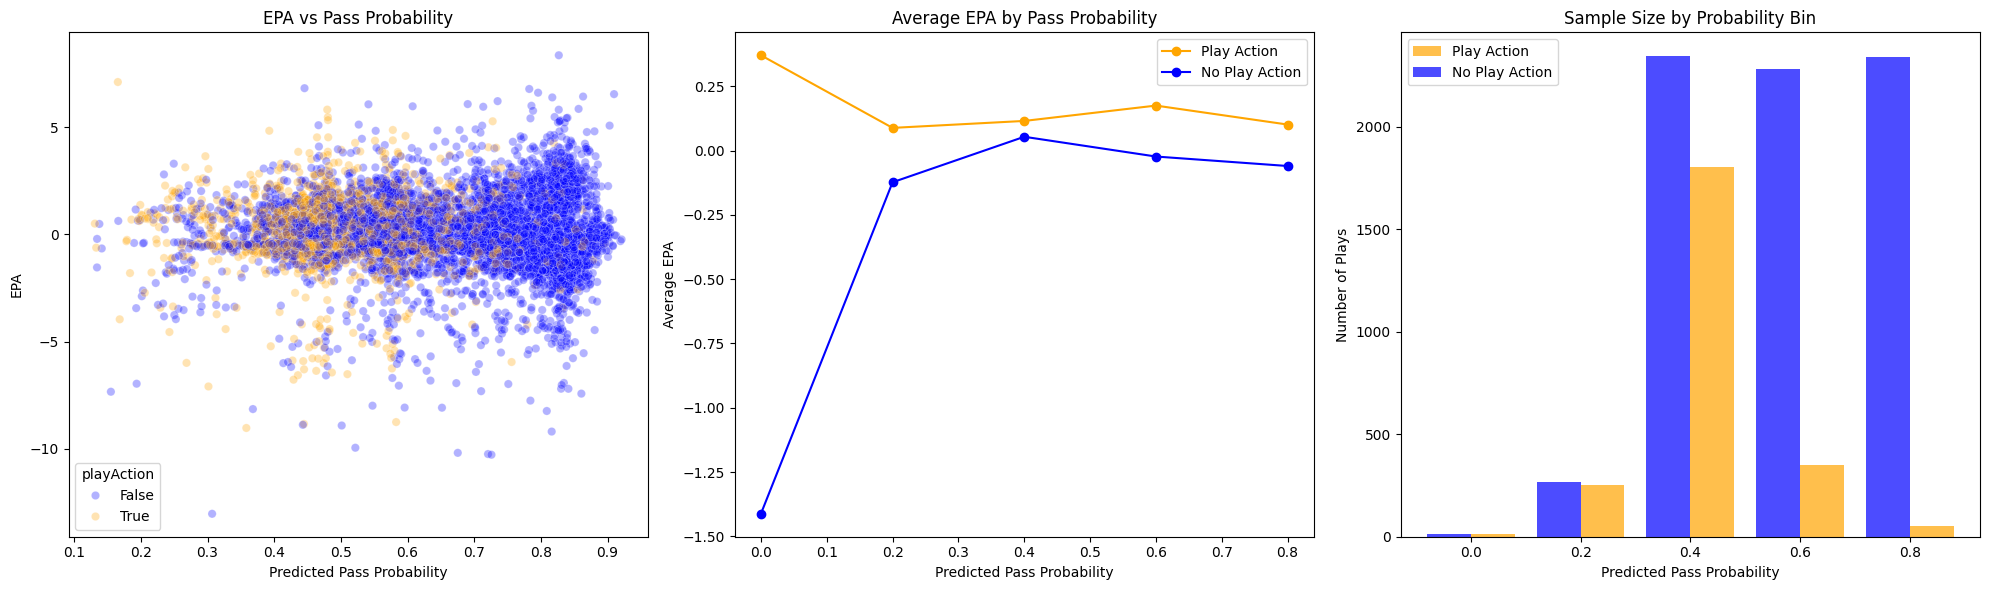

In [132]:
results = analyze_playaction_epa(playaction_df)
plt.show()

In [112]:
# Check data values
print("Pass probability range:", playaction_df['pass_probability'].min(), "to", playaction_df['pass_probability'].max())
print("Pass probability unique values:", playaction_df['pass_probability'].unique())
print("\nPlayAction values:", playaction_df['playAction'].unique())

Pass probability range: 0.09954643860538524 to 0.9209317147965721
Pass probability unique values: [0.47792205 0.48030548 0.56573172 ... 0.63521685 0.76013202 0.60739805]

PlayAction values: [False nan True]


In [33]:
df_train['prediction'] = results['predicted_probs']
df_train.to_csv('2020_train.csv')


In [154]:
years =[2021, 2022,2023,2024]
quarterback_df = None

for year in years:
    url = f'https://www.pro-football-reference.com/years/{year}/passing_advanced.htm#passing_advanced'
    df = pd.read_html(url)[0]
    df['year'] = year
    if quarterback_df is None:
        quarterback_df = df
    else:
        quarterback_df = pd.concat([quarterback_df, df])

In [155]:
quarterback_df.to_csv('quarterbacks.csv')
print(df.at[0,('PlayAction', 'PassAtt')])

53.0
